# Mitsiu Alejandro Carreño Sarabia - E23S-1804
## Ejercicio de preprocesamiento

In [1]:
import pandas as pd
#from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Selección de variables o registros

In [3]:
# Evaluamos como pandas interpretó los datos y que tipos asignó
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# Como el dataset me es totalmente nuevo, puedo imprimir cuantos valores
# únicos tiene cada columna
dataset.nunique()
# el total de registros son 891 renglones, y PassengerId y name son únicos,
# con ello puedo confirmar que cada renglón representa un pasajero

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [5]:
# También puede ser relevante saber que valores existen, por ejemplo puedo saber
#que survived es una categoría si/no, Sex male/female
# incluso que Age, y Cabin tienen nan
pd.Series({col: dataset[col].unique() for col in dataset})

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Survived                                                  [0, 1]
Pclass                                                 [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John B...
Sex                                               [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
SibSp                                      [1, 0, 3, 4, 2, 5, 8]
Parch                                      [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
Cabin          [nan, C85, C123, E46, G6, C103, D56, A6, C23 C...
Embarked                                          [S, C, Q, nan]
dtype: object

In [6]:
interest = dataset.loc[:,["PassengerId", "Survived", "Pclass", "Sex", "Ticket", "Fare", "Cabin", "Embarked", "Age"]]
#interest.loc[:, "Age"] = dataset.loc[:,"Age"].astype(int)


# Tratamiento de valores faltantes

In [7]:
# Podemos contar cuantos registros no tienen valor, para poder tomar decisiones 
# respecto a como manejarlos, si hacemos un dropna de cabin, impacta más que 
# un dropna de embarked
interest.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age            177
dtype: int64

In [8]:
# Podemos agregar la edad media a todos los registros que no tienen edad
interest = interest.fillna({"Age": round(interest["Age"].mean())})

# Veamos cuales son los dos registros sin valor en embarked
interest.query("Embarked.isnull()")

,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Age
61,62,1,1,female,113572,80.0,B28,NaN,38.0
829,830,1,1,female,113572,80.0,B28,NaN,62.0


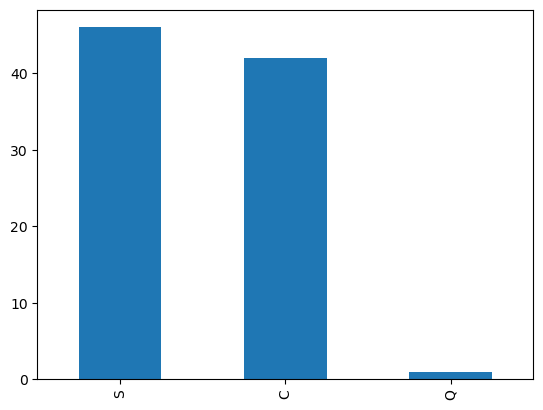

In [9]:
# Filtramos por las caracteristicas de los renglones que no tienen Embarked, y contabilizamos para
# búscar alguna tendencia respecto a Embarked
interest.query("Survived == 1 & Pclass == 1 & Sex == 'female'")["Embarked"].value_counts().plot(kind="bar")
# Para fines prácticos voy a asignar S y C a cada renglon, ya que son los datos más comúnes para esta demgrafía
interest.at[61,"Embarked"] = "S"
interest.at[829, "Embarked"] = "C"



In [10]:
# Finalmente podemos llenar los valores de Cabin por el elemento más cercano
interest.sort_values(["Pclass", "Fare"])
interest["Cabin"] = interest["Cabin"].interpolate('nearest')
interest.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age              0
dtype: int64

# Tratamiento de valores atípicos

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

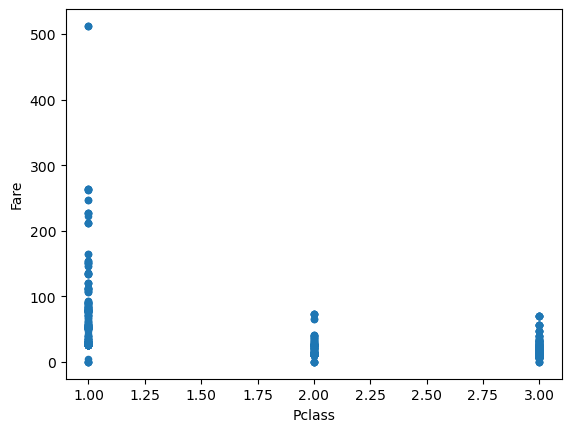

In [11]:
# Podemos observar que existe un valor de Fare que excede por mucho la media tanto general como la de la 
# Pclass particular
interest.plot(x="Pclass", y="Fare", kind="scatter")

In [12]:
# Si investigamos un poco, vemos que se refiere al 
print(interest.query("Fare > 500"))

interest.query("Ticket == 'PC 17755'")

# Y todas pertenecen al mismo ticket, es díficil solo con esta información decidir, 
# ya que puede tratarse de un valor correcto pero atipico, o puede ser un error


     PassengerId  Survived  Pclass     Sex    Ticket      Fare        Cabin  \
258          259         1       1  female  PC 17755  512.3292          NaN   
679          680         1       1    male  PC 17755  512.3292  B51 B53 B55   
737          738         1       1    male  PC 17755  512.3292         B101   

    Embarked   Age  
258        C  35.0  
679        C  36.0  
737        C  35.0  


,PassengerId,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,Age
258,259,1,1,female,PC 17755,512.3292,NaN,C,35.0
679,680,1,1,male,PC 17755,512.3292,B51 B53 B55,C,36.0
737,738,1,1,male,PC 17755,512.3292,B101,C,35.0


<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

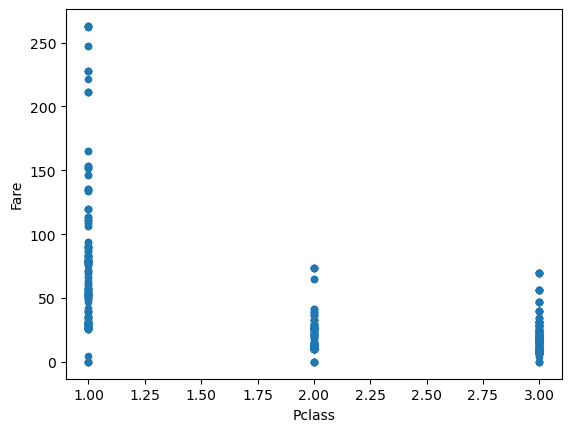

In [13]:
interest = interest.drop(interest[interest.Fare > 500].index)

interest.plot(x="Pclass", y="Fare", kind="scatter")

# Transformación de formatos

In [14]:
# Dado que Embarked, Sex y Cabin corresponden a categorías hace sentido convertilas a ese tipo
interest["Embarked"] = pd.Categorical(interest["Embarked"])
interest["Sex"] = pd.Categorical(interest["Sex"])
interest["Cabin"] = pd.Categorical(interest["Cabin"])

## Ejercicio

Calcula el porcentaje de años estudiados por individuo

In [15]:
personas = pd.read_csv("https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CPV_CB_Personas_ejemplo_csv.zip",dtype=str)
personas

,ENT,MUN,LOC,AGEB,MZA,SEG,ID_VIV,ID_PERSONA,TIPO_REG,CLASE_VIV,...,ESCOACUM,ENT_PAIS_RES_5A,MUN_RES_5A,CAUSA_MIG_V,SITUA_CONYUGAL,CONACT,HIJOS_NAC_VIVOS,HIJOS_FALLECIDOS,TAMLOC,TAMLOC14
0,21,108,0001,0017,001,N,211080000005,21108000000500001,0,02,...,15,021,108,NaN,8,10,NaN,NaN,5,13
1,21,108,0001,0017,001,N,211080000005,21108000000500003,0,02,...,5,023,009,0301,5,80,11,0,5,13
2,21,108,0001,0017,001,N,211080000005,21108000000500002,0,02,...,3,023,009,0301,5,80,NaN,NaN,5,13
3,14,086,0001,0017,003,N,140860001428,14086000142800003,0,03,...,NaN,014,086,NaN,NaN,NaN,NaN,NaN,5,13
4,14,086,0001,0017,003,N,140860001428,14086000142800001,0,03,...,9,014,086,NaN,1,10,1,0,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257501,14,065,0017,0049,800,N,140650001652,14065000165200004,0,01,...,6,014,065,NaN,8,50,0,NaN,1,01
1257502,14,009,0020,0053,800,N,140090000378,14009000037800001,0,01,...,1,014,009,NaN,2,10,NaN,NaN,1,01
1257503,21,210,0037,0034,002,N,212100000299,21210000029900003,0,01,...,1,021,210,NaN,NaN,NaN,NaN,NaN,1,01
1257504,21,210,0037,0034,002,N,212100000299,21210000029900002,0,01,...,6,021,210,NaN,7,60,1,0,1,01


ID_PERSONA        0
EDAD              0
ESCOACUM      57819
dtype: int64


<AxesSubplot: xlabel='EDAD', ylabel='ESCOACUM'>

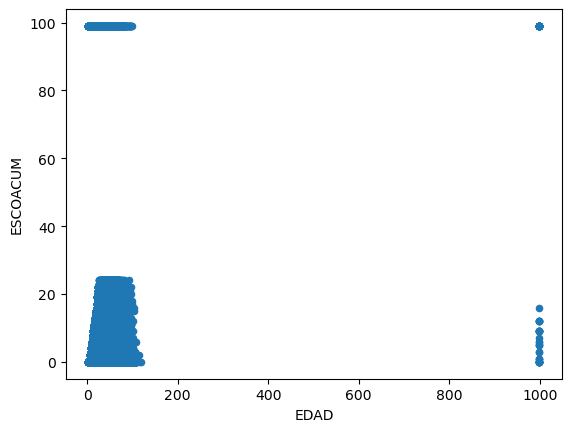

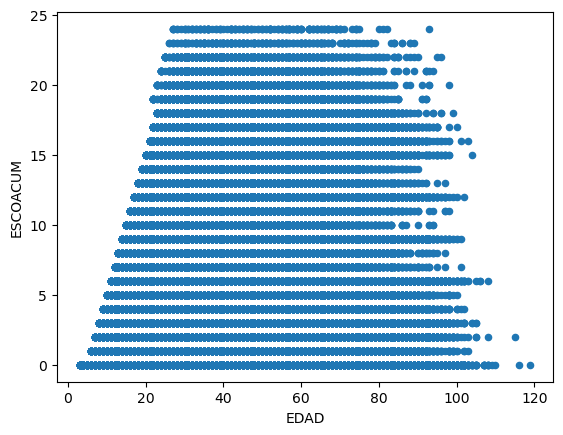

In [16]:
personas_interest = personas.loc[:,["ID_PERSONA"]]
personas_interest.loc[:, "EDAD"] = personas.loc[:, "EDAD"].astype(int)
personas_interest.loc[:, "ESCOACUM"] = personas.loc[:, "ESCOACUM"].astype(float)
#personas_interest['ESCOACUM'] = personas_interest['ESCOACUM'].fillna(personas_interest.groupby('PARENT')['ESCOACUM'].transform('mean'))
print(personas_interest.isnull().sum())

#personas_interest.query("ESCOACUM > EDAD")

personas_interest.plot(x="EDAD", y="ESCOACUM", kind="scatter")
#personas_interest.query("EDAD > 200").plot(x="EDAD", y="ESCOACUM", kind="scatter")

# Borramos los renglones 
personas_interest = personas_interest.drop(personas_interest[personas_interest.EDAD > 200].index)
personas_interest = personas_interest.drop(personas_interest[personas_interest.ESCOACUM > 90].index)

personas_interest.plot(x="EDAD", y="ESCOACUM", kind="scatter")

In [17]:
Y = ((personas_interest["ESCOACUM"].values * 100)/personas_interest["EDAD"].values).reshape(-1,1)
print(Y)
#personas_interest.plot(x ="ID_PERSONA", y="EDAD", kind="scatter")

[[42.85714286]
 [ 7.57575758]
 [ 3.84615385]
 ...
 [14.28571429]
 [15.78947368]
 [16.66666667]]
